In [1]:
import numpy as np
import pandas as pd

import os
import glob

import matplotlib.pyplot as plt

from statcast_batter_analysis import Batter,Game,AtBat

In [2]:
#df = pd.read_csv('Data/2021/Nationals.csv')
df = pd.read_csv('Data/aggregated-data-2021.csv')

In [3]:
df.shape

(562786, 92)

In [4]:
df = df.rename(columns={'events':'event_result','description':'event'})

In [5]:
excluded_events = ['foul_bunt','missed_bunt','hit_by_pitch','bunt_foul_tip']

In [6]:
excluded_results = ['hit_by_pitch','sac_bunt','catcher_interf']

In [7]:
df.shape

(562786, 92)

In [8]:
for event in excluded_events:
    df = df[df['event']!=event]

In [9]:
for result in excluded_results:
    df = df[df['event_result']!=result]

In [10]:
df.shape

(558817, 92)

In [11]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,event_result,event,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2021-08-27,91.0,-2.21,5.37,"Gregorius, Didi",544369,642203,field_out,hit_into_play,...,0,0,2,2,0,Infield shift,Standard,220.0,-0.006,-0.100
1,FF,2021-08-27,91.5,-2.44,5.25,"Gregorius, Didi",544369,642203,NaN,ball,...,0,0,2,2,0,Infield shift,Standard,225.0,0.000,0.014
2,FF,2021-08-27,90.2,-2.50,5.41,"Gregorius, Didi",544369,642203,NaN,called_strike,...,0,0,2,2,0,Infield shift,Standard,219.0,0.000,-0.019
3,FF,2021-08-27,91.3,-2.50,5.33,"Realmuto, J.T.",592663,642203,field_out,hit_into_play,...,0,0,2,2,0,Standard,Standard,224.0,-0.011,-0.185
4,FF,2021-08-27,90.2,-2.50,5.31,"Realmuto, J.T.",592663,642203,NaN,ball,...,0,0,2,2,0,Standard,Standard,219.0,0.000,0.025


In [12]:
players = df['player_name'].unique()

In [13]:
batters = []
for player in players:
    print(player)
    player_df = df[df['player_name']==player]
    print(player_df.shape)
    batter = Batter(player,player_df)
    
    batters.append(batter)

Gregorius, Didi
(1147, 92)
Realmuto, J.T.
(1656, 92)


/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['isStrike'] = (self.data['plate_x'] >= self.sz_left) & (self.data['plate_x'] <= self.sz_right) & (
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['isSwing'] = (self.data['event']=='hit_into_play') | (self.data['event']=='foul') | (
/Users/jacobhow/Documents/statcast-batter-analy

Harper, Bryce
(1775, 92)
Segura, Jean
(1658, 92)
Herrera, Odúbel
(1413, 92)
Nola, Aaron
(189, 92)
Jankowski, Travis
(510, 92)
Galvis, Freddy
(1106, 92)
Miller, Brad
(1129, 92)
McCutchen, Andrew
(1815, 92)
Bonifacio, Jorge
(17, 92)
Torreyes, Ronald
(873, 92)
Moore, Matt
(75, 92)
Knapp, Andrew
(525, 92)
Williams, Luke
(397, 92)
Wheeler, Zack
(210, 92)
Hoskins, Rhys
(1881, 92)
Suárez, Ranger
(18, 92)
Gibson, Kyle
(50, 92)
Bohm, Alec
(1641, 92)
Moniak, Mickey
(118, 92)
Maton, Nick
(496, 92)
Hammer, JD
(4, 92)
Neris, Héctor
(3, 92)
Marchan, Rafael
(82, 92)
Anderson, Chase
(39, 92)
Velasquez, Vince
(71, 92)
Howard, Spencer
(33, 92)
Eflin, Zach
(117, 92)
Vierling, Matt
(25, 92)
Falter, Bailey
(8, 92)
Joyce, Matt
(237, 92)
Bradley, Archie
(4, 92)
Quinn, Roman
(244, 92)
Kingery, Scott
(74, 92)
Haseley, Adam
(88, 92)
Flores, Wilmer
(1467, 92)
Posey, Buster
(1342, 92)
Ruf, Darin
(1048, 92)
Wade Jr., LaMonte
(1075, 92)
Slater, Austin
(1041, 92)
Gausman, Kevin
(151, 92)
La Stella, Tommy
(614, 92)
E

(825, 92)
Campbell, Paul
(18, 92)
Hess, David
(14, 92)
Díaz, Lewin
(131, 92)
Rogers, Trevor
(114, 92)
Miller, Brian
(22, 92)
Duvall, Adam
(1692, 92)
Wallach, Chad
(291, 92)
Berti, Jon
(1133, 92)
Holloway, Jordan
(41, 92)
Harrison, Monte
(34, 92)
Cooper, Garrett
(997, 92)
López, Pablo
(115, 92)
Bender, Anthony
(8, 92)
Okert, Steven
(6, 92)
Detwiler, Ross
(15, 92)
Marté, Luis
(28, 92)
Curtiss, John
(7, 92)
Poteet, Cody
(35, 92)
Pop, Zach
(5, 92)
Dickerson, Corey
(1149, 92)
Devers, José
(172, 92)
Cimber, Adam
(9, 92)
Bleier, Richard
(2, 92)
Castano, Daniel
(10, 92)
Bogaerts, Xander
(2088, 92)
Schwarber, Kyle
(1428, 92)
Muñoz, Yairo
(8, 92)
Araúz, Jonathan
(146, 92)
Duran, Jarren
(358, 92)
Vázquez, Christian
(1613, 92)
Dalbec, Bobby
(1432, 92)
Verdugo, Alex
(1949, 92)
Devers, Rafael
(1961, 92)
Arroyo, Christian
(662, 92)
Martinez, J.D.
(1920, 92)
Hernández, Enrique
(1849, 92)
Renfroe, Hunter
(1707, 92)
Plawecki, Kevin
(466, 92)
Cordero, Franchy
(532, 92)
Gonzalez, Marwin
(1044, 92)
Wong, C

(924, 92)
Story, Trevor
(1828, 92)
Márquez, Germán
(121, 92)
Senzatela, Antonio
(111, 92)
Gray, Jon
(155, 92)
Trejo, Alan
(182, 92)
Gomber, Austin
(98, 92)
González, Chi Chi
(107, 92)
Daza, Yonathan
(1086, 92)
Tapia, Raimel
(1578, 92)
Goudeau, Ashton
(4, 92)
Fuentes, Joshua
(987, 92)
Adams, Matt
(138, 92)
Owings, Chris
(194, 92)
Chacín, Jhoulys
(22, 92)
Almonte, Yency
(8, 92)
Castellani, Ryan
(3, 92)
Moncada, Yoán
(2112, 92)
Jiménez, Eloy
(384, 92)
Abreu, José
(2086, 92)
Robert, Luis
(559, 92)
Anderson, Tim
(1766, 92)
García, Leury
(1275, 92)
Vaughn, Andrew
(1578, 92)
Grandal, Yasmani
(1169, 92)
Lamb, Jake
(522, 92)
Zavala, Seby
(362, 92)
Goodwin, Brian
(955, 92)
Collins, Zack
(855, 92)
Mendick, Danny
(712, 92)
Engel, Adam
(454, 92)
Cease, Dylan
(20, 92)
Rodón, Carlos
(11, 92)
Sheets, Gavin
(454, 92)
Lynn, Lance
(19, 92)
Hamilton, Billy
(433, 92)
Kopech, Michael
(7, 92)
Burger, Jake
(182, 92)
Giolito, Lucas
(14, 92)
Mercedes, Yermín
(1096, 92)
González, Luis
(50, 92)
Madrigal, Nick
(80

In [14]:
def sortFunc(x):
    return x.data.shape[0]

batters.sort(reverse=True,key=sortFunc)

In [15]:
results = {}
for batter in batters[:200]:
    print(batter)
    k_rate = batter.calculate_strikeout_rate()
    walk_rate = batter.calculate_walk_rate()
    bb_minus_k_rate = walk_rate - k_rate
    chase_rate = batter.calculate_chase_rate()
    chase_rate_plus = batter.calculate_chase_rate_plus()
    chase_rate_plus_rms = batter.calculate_chase_rate_plus_rms()
    
    batter_results = {}
    batter_results['K%'] = k_rate
    batter_results['BB%'] = walk_rate
    batter_results['BB% - K%'] = bb_minus_k_rate
    batter_results['chase rate'] = chase_rate
    batter_results['chase rate plus'] = chase_rate_plus
    batter_results['chase rate plus rms'] = chase_rate_plus_rms
    results[batter.name] = batter_results

Semien, Marcus
Grossman, Robbie
Goldschmidt, Paul
Chapman, Matt
Santana, Carlos
Haniger, Mitch
Crawford, J.P.
Olson, Matt
Lowe, Nathaniel
Gallo, Joey
LeMahieu, DJ
Correa, Carlos
Moncada, Yoán
Bogaerts, Xander
Abreu, José
Freeman, Freddie
Albies, Ozzie
Schoop, Jonathan
Ohtani, Shohei
Canha, Mark
Candelario, Jeimer
Bichette, Bo
Swanson, Dansby
India, Jonathan
Judge, Aaron
Hernández, César
Edman, Tommy
Merrifield, Whit
Seager, Kyle
Ramírez, José
Carlson, Dylan
Taylor, Chris
Riley, Austin
Mullins, Cedric
Mancini, Trey
Meadows, Austin
Pham, Tommy
Cronenworth, Jake
Straw, Myles
Reynolds, Bryan
Soto, Juan
Arenado, Nolan
Escobar, Eduardo
Suárez, Eugenio
Turner, Trea
Devers, Rafael
Polanco, Jorge
Aguilar, Jesús
Guerrero Jr., Vladimir
Verdugo, Alex
Arozarena, Randy
Turner, Justin
García, Adolis
Frazier, Adam
Altuve, Jose
Martinez, J.D.
Adames, Willy
Lowe, Brandon
McMahon, Ryan
Stanton, Giancarlo
Muncy, Max
Hoskins, Rhys
Perez, Salvador
Alvarez, Yordan
Winker, Jesse
Soler, Jorge
Kiner-Falefa, Isi

In [16]:
df = pd.DataFrame.from_dict(results,orient='index')

In [17]:
df

,K%,BB%,BB% - K%,chase rate,chase rate plus,chase rate plus rms
"Semien, Marcus",0.217,0.088,-0.129,0.232,0.312,0.323
"Grossman, Robbie",0.224,0.145,-0.079,0.173,0.237,0.245
"Goldschmidt, Paul",0.202,0.089,-0.113,0.265,0.362,0.374
"Chapman, Matt",0.323,0.123,-0.200,0.245,0.340,0.352
"Santana, Carlos",0.155,0.129,-0.026,0.233,0.300,0.307
...,...,...,...,...,...,...
"Larnach, Trevor",0.347,0.103,-0.244,0.266,0.382,0.395
"Odor, Rougned",0.269,0.071,-0.198,0.306,0.425,0.441
"Torrens, Luis",0.265,0.081,-0.184,0.265,0.354,0.365
"Zunino, Mike",0.372,0.092,-0.280,0.292,0.428,0.445


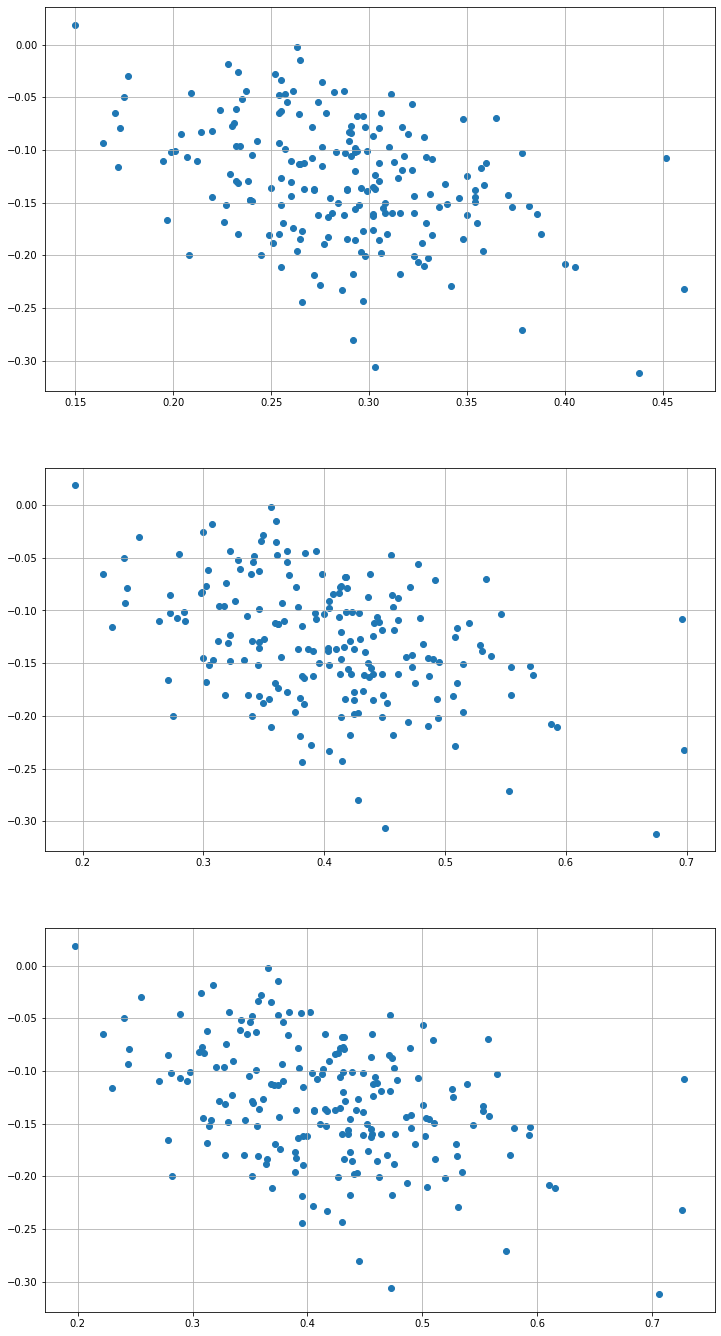

In [20]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,24))

x_key = 'chase rate'
x = df[x_key].values
y = df['BB% - K%'].values
ax1.scatter(x,y)

x_key = 'chase rate plus'
x = df[x_key].values
y = df['BB% - K%'].values
ax2.scatter(x,y)

x_key = 'chase rate plus rms'
x = df[x_key].values
y = df['BB% - K%'].values
ax3.scatter(x,y)

for ax in (ax1,ax2,ax3):
    ax.grid()

plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

In [33]:
x_key = 'chase rate'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.1521871595991383

In [34]:
x_key = 'chase rate plus'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.16590333351890074

In [35]:
x_key = 'chase rate plus rms'
y_key = 'BB% - K%'
x = df[x_key].values.reshape(-1, 1)
y = df[y_key].values

reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.16884399590832666